In [2]:
# IMPORTING ALL NECESSARY LIBRARIES

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# IMPORTING THE TRAINING FILE

df_train = pd.read_csv("C:\\Users\\sivac\\Documents\\Analytics\\Banco Santander Kaggle\\input\\train.csv")
#df_test = pd.read_csv("C:\\Users\\sivac\\Documents\\Python Projects\\Banco Santander Kaggle\\input\\test.csv")


In [5]:
# PREPARING TRAIN DATA

df_train.drop('ID_code', axis=1, inplace=True)
y = df_train['target']
x = df_train.drop('target', axis=1)

#ID = df_test.ID_code
#df_test.drop('ID_code', axis=1, inplace=True)

IN ORDER TO PERFORM GUASSIAN MODEL, WE NEED TO MAKE SURE THEY ARE DISTRIBUTED NORMALLY AND THE PREDICTORS ARE INDEPENDENT OF EACH OTHER

In [6]:
# # Standardizing data using Power Transformer
# from sklearn.preprocessing import PowerTransformer

# standardizeData = PowerTransformer(method='yeo-johnson', standardize=True)

# x_cols = x.columns
# x = standardizeData.fit_transform(x)
# x = pd.DataFrame(data=x, columns=x_cols)

# plt.subplot(211)
# x[y==1].plot.kde(ind=100, legend=False)
# plt.title('Classifier=1')
# plt.subplot(212)
# x[y==0].plot.kde(ind=100, legend=False)
# plt.title('Classifier=0')
# plt.show()

In [7]:
# # STANDARDIZING FEATURES USING QUANTILE TRANSFORMER
# from sklearn.preprocessing import QuantileTransformer

# quantileTransformer = QuantileTransformer(output_distribution='normal')
# colNames = x_train.columns

# x_train = quantileTransformer.fit_transform(x_train)
# x_train = pd.DataFrame(data=x_train, columns=colNames)

# x_validation = quantileTransformer.fit_transform(x_validation)
# x_validation = pd.DataFrame(data=x_validation, columns=colNames)

In [8]:
# # Standardizing data using Min Max Scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# colNames = x.columns

# x = scaler.fit_transform(x)
# x = pd.DataFrame(data=x, columns=colNames)

In [9]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x,y, stratify=y, random_state=1, test_size=0.25)

In [10]:
# # UNDER SAMPLING DATA
# sampleData = x_train.copy()
# sampleData['target'] = y_train

# underSample_length = len(sampleData[sampleData.target == 1])

# zero_target_indices = sampleData[sampleData.target == 0].index
# random_indices = np.random.choice(zero_target_indices, underSample_length, replace=False)

# target_data = sampleData[sampleData.target == 1]
# zero_target_data = sampleData[sampleData.index.isin(random_indices)]
# x_train = pd.concat([target_data, zero_target_data])

# y_train = x_train['target']
# x_train = x_train.drop('target', axis=1)

# # OVERSAMPLING TRAINING DATA
# from imblearn.over_sampling import SMOTE

# os = SMOTE(random_state=0)
# columns = x_train.columns
# x_train,y_train =os.fit_sample(x_train, y_train)
# x_train = pd.DataFrame(data=x_train,columns=columns )
# y_train= pd.DataFrame(data=y_train,columns=['target'])

In [11]:
# Running a Naive Bayes Guassian Model:
# Guassian model because the predictors follow a Normal Distribution

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Training the model using the training data

model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data")
print(classification_report(y_validation, predictions))

Confustion Matrix for Training Data
[[132692   2235]
 [  9526   5547]]
Confustion Matrix for Test Data
[[44249   726]
 [ 3199  1826]]
Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    134927
           1       0.71      0.37      0.49     15073

   micro avg       0.92      0.92      0.92    150000
   macro avg       0.82      0.68      0.72    150000
weighted avg       0.91      0.92      0.91    150000

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     44975
           1       0.72      0.36      0.48      5025

   micro avg       0.92      0.92      0.92     50000
   macro avg       0.82      0.67      0.72     50000
weighted avg       0.91      0.92      0.91     50000



AUROC Plot: 0.8881


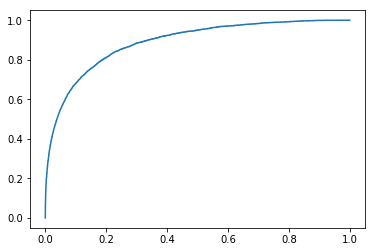

In [13]:
# AUC ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show() 

Confustion Matrix for Training Data - Logistic Regression
[[133083   1844]
 [ 10993   4080]]
Confustion Matrix for Test Data - Logistic Regression
[[44374   601]
 [ 3664  1361]]
Classification Report for Training Data - Logistic Regression
             precision    recall  f1-score   support

          0       0.92      0.99      0.95    134927
          1       0.69      0.27      0.39     15073

avg / total       0.90      0.91      0.90    150000

Classification Report for Test Data - Logistic Regression
             precision    recall  f1-score   support

          0       0.92      0.99      0.95     44975
          1       0.69      0.27      0.39      5025

avg / total       0.90      0.91      0.90     50000

AUROC Plot from Logistic Regression: 0.8585


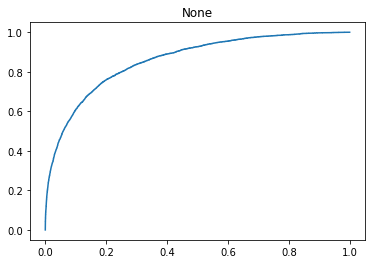

In [6]:
# Running a Logistic Regression

from sklearn.linear_model import LogisticRegression

# Training the model using the training data

model = LogisticRegression()
model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data - Logistic Regression")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data - Logistic Regression")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data - Logistic Regression")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data - Logistic Regression")
print(classification_report(y_validation, predictions))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot from Logistic Regression:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show() 

Confustion Matrix for Training Data - Random Forest
[[134927      0]
 [  2208  12865]]
Confustion Matrix for Test Data - Random Forest
[[44915    60]
 [ 4934    91]]
Classification Report for Training Data - Random Forest
             precision    recall  f1-score   support

          0       0.98      1.00      0.99    134927
          1       1.00      0.85      0.92     15073

avg / total       0.99      0.99      0.98    150000

Classification Report for Test Data - Random Forest
             precision    recall  f1-score   support

          0       0.90      1.00      0.95     44975
          1       0.60      0.02      0.04      5025

avg / total       0.87      0.90      0.86     50000

AUROC Plot from Random Forest: 0.7063


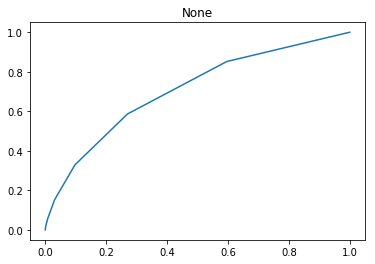

In [14]:
# Running a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Training the model using the training data
model = RandomForestClassifier()
model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data - Random Forest")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data - Random Forest")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data - Random Forest")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data - Random Forest")
print(classification_report(y_validation, predictions))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot from Random Forest:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show() 

Confustion Matrix for Training Data - Decision Tree
[[134927      0]
 [     0  15073]]
Confustion Matrix for Test Data - Decision Tree
[[40671  4304]
 [ 3999  1026]]
Classification Report for Training Data - Decision Tree
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    134927
          1       1.00      1.00      1.00     15073

avg / total       1.00      1.00      1.00    150000

Classification Report for Test Data - Decision Tree
             precision    recall  f1-score   support

          0       0.91      0.90      0.91     44975
          1       0.19      0.20      0.20      5025

avg / total       0.84      0.83      0.84     50000

AUROC Plot from Decision Tree: 0.5542


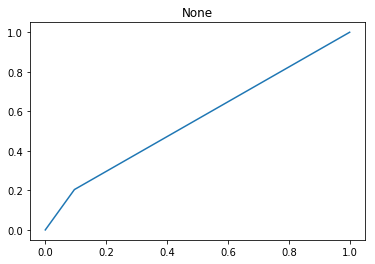

In [15]:
# Running a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Training the model using the training data
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data - Decision Tree")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data - Decision Tree")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data - Decision Tree")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data - Decision Tree")
print(classification_report(y_validation, predictions))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot from Decision Tree:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show() 

In [ ]:
# # Running a Support Vector Machine

# from sklearn.svm import SVC

# # Training the model using the training data
# model = SVC()
# model.fit(x_train, y_train)
# train_predictions = model.predict(x_train)
# predictions = model.predict(x_validation)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# # Confusion Matrix Comparison
# print("Confustion Matrix for Training Data - Support Vector Machine")
# print(confusion_matrix(y_train, train_predictions))
# print("Confustion Matrix for Test Data - Support Vector Machine")
# print(confusion_matrix(y_validation, predictions))

# # Classification Report Comparison
# print("Classification Report for Training Data - Support Vector Machine")
# print(classification_report(y_train, train_predictions))
# print("Classification Report for Test Data - Support Vector Machine")
# print(classification_report(y_validation, predictions))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

# predictions = model.predict_proba(x_validation)[:,1]
# roc_auc_score(y_validation, predictions, average='weighted')

# fpr, tpr, threshold = roc_curve(y_validation, predictions)

# # Calculating the AUC Score
# auc = np.trapz(tpr,fpr)
# pltTitle = print("AUROC Plot from Decision Tree:", "%.4f" %auc)

# # Plotting the ROC Curve
# plt.plot(fpr,tpr)
# plt.title(pltTitle)
# plt.show() 

In [15]:
# # APPLYING THE MODEL TO TEST DATA

# df_test = scaler.fit_transform(df_test)
# df_test = pd.DataFrame(data=df_test, columns=colNames)
# predictions = model.predict_proba(df_test)[:,1]
# output = pd.DataFrame({'ID_code': ID, 'target': predictions})

In [ ]:
# output.to_csv("C:\\Users\\sivac\\Documents\\Python Projects\\Banco Santander Kaggle\\output\\Submission 17 - Naive Bayes Using MinMax Transformation Prob.csv", index=False)